<a href="https://colab.research.google.com/github/Abdibaset/ML_CS74/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW3


In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Please run the cell below to import libraries needed for this HW. Please use the autograd numpy, otherwise you will have issues. Please remember to always use the np library for mathematical functions (e.g., np.log, np.exp, np.sum, etc)

In [80]:
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt
%matplotlib inline

Q1) [5 points] Implement the sigmod funcation discussed in class. The function takes a value, x, as input and returns the sigmoid function applied to the value.

In [81]:
def sigmoid(x):
  return np.array(1/(1+np.exp(-x)))

Q2) [20 points] Implement the logistic regression model and the cross entropy cost discussed in class. Note that the logistic regression model relies on the sigmoid function (which you have implemented above) and the linear  model (which you have implemented in HW2). You can use the linear model from HW2 for this problem. Similar to the least-squares cost from HW2, the cross entropy cost takes in as input an array of weights, w, an array of x's and an array of ys and return a float indicating the total cost.

In [82]:
#Your linear model from HW2
def model(x,w):
  return w[0] + w[1]*x

#The logistic regression cross entropy cost
def cross_entropy(w,x,y):
  model_output = model(x, w)
  class_one = y*np.log(sigmoid(model_output))
  class_two = (1-y)*np.log(1-sigmoid(model_output))
  return -np.mean(class_one + class_two)

Run the code below to read a data file and plot a scatter plot of x vs y.

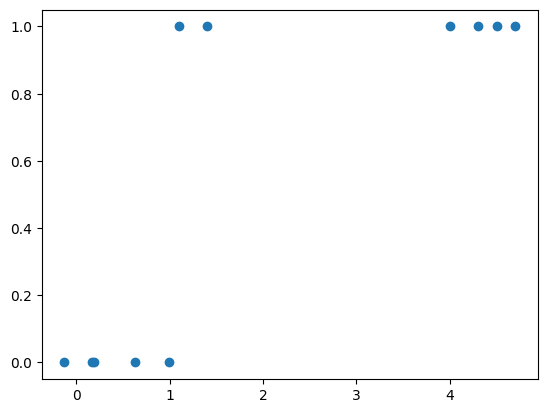

In [83]:
csvname = '2d_classification_data_v1_entropy.csv'
data = np.loadtxt(csvname,delimiter = ',')
x_classification_data = data[:-1,:]
y_classification_data = data[-1:,:]

plt.scatter(x_classification_data,y_classification_data)

Q3) [10 points] Move the gradient descent function from HW2. Run the function using the cross_entropy cost and the x and y from above. The parameters should be set to: max_its=2000,w=[3.0,3.0 ], and alpha=1. Save the cost and weight history returned by the gradient descent function. Plot the cost history.


In [84]:
##gradient descent from HW2
def gradient_descent(g,alpha,max_its,w,x,y):
    gradient = grad(g)   ## This is how you use the autograd library to find the gradient of a function
    weight_history = [w]
    w, x, y = np.array(w), np.array(x), np.array(y)
    cost_history = [g(w, x, y)]
    for i in range(1, max_its):
      # print(np.array(gradient(weight_history[i-1], x, y)))
      curr_weight = weight_history[i-1]- alpha*np.array(gradient(weight_history[i-1], x, y))
      weight_history.append(curr_weight)
      cost_history.append(g(weight_history[i], x, y))
    return weight_history,cost_history


Text(0.5, 1.0, 'cost_history against number of steps for classification data')

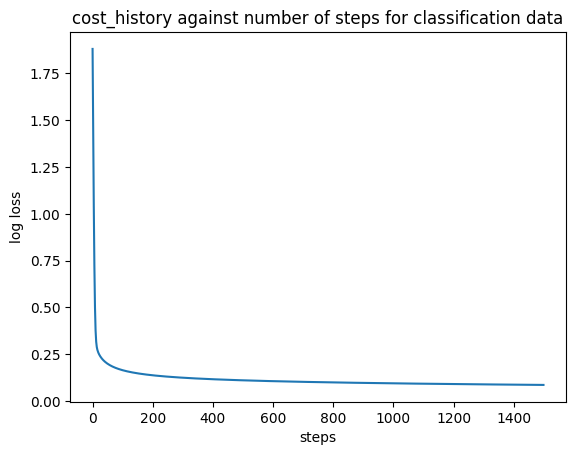

In [85]:
##Call the gradient_descent function here
##Plot the cost history here

alpha = 1
max_its = 1500
weights = [3.0, 3.0]
weight_history, cost_history = gradient_descent(cross_entropy, alpha, max_its, weights, x_classification_data, y_classification_data)
plt.plot(cost_history)
plt.xlabel('steps')
plt.ylabel('log loss')
plt.title('cost_history against number of steps for classification data')

Q4) [10 points] Implement a logistic regression classifier that takes in the learned weights and x as input and returns the probability of the positive class (note that this is just the output of the sigmoid applied to the linear combination of the x and w)

In [86]:
def logistic_regression(learned_w,x):
  return sigmoid(model(x, learned_w))

Q5) [5 points] Use the learned weights from the last gradient descent run and the logistic regression function implemented above to plot the learned curve. You can use the linspace method (shown below) to generate a list of xs that you can use. You need to generate a y for each of the candidate xs using the logistic regression function and the learned weights. On the same figure, also plot the scatter plot from Q2.


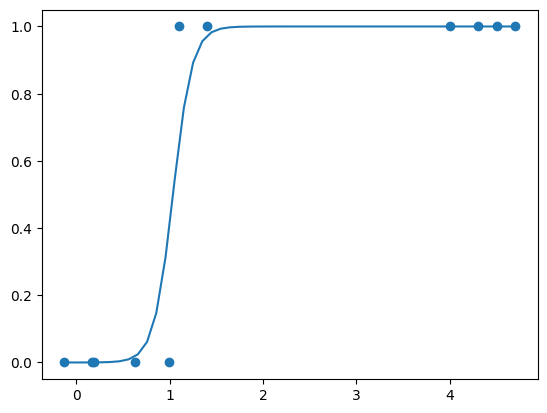

In [87]:
s = np.linspace(np.min(x_classification_data),np.max(x_classification_data))
learned_weights = weight_history[cost_history.index(min(cost_history))]
plt.scatter(x_classification_data, y_classification_data)
plt.plot(s, logistic_regression(learned_weights, s))

Q6) [5 points] Slightly modify the logistic regression model above so that it returns a 1 or 0 based on the specified threshold.

In [88]:
def logistic_regression_modified(learned_w,x, threshold):
    if logistic_regression(learned_w, x) <= threshold:
      return 0
    else:
      return 1

Q7) [15 points] Write a function (called evaluate) that takes in actual and predicted ys (for a binary classification problem) and return a confusion matrix and the accuracy. Use the modified logistic regression model and the evaluate function below to report the confusion matrix and accuracy for the x and y used for our training at a threshold of 0.5.  

In [89]:
def evaluate(y_actual,y_pred):
    ## Your code here
    false_positive = 0
    false_negative = 0
    true_positive = 0
    true_negative = 0

    if y_actual == y_pred:
      if y_actual == 1 and y_pred == 1:
        true_positive += 1
      else:
        true_negative += 1

    if y_actual != y_pred:
      if y_actual == 1 and y_pred == 0:
        false_positive += 1
      else:
        false_negative += 1
    accuracy = (true_positive + true_negative)/(false_positive + false_negative + true_positive + true_negative)
    return false_positive, false_negative, true_positive, true_negative, accuracy

learned_w = weight_history[cost_history.index(min(cost_history))]
class_prob = [logistic_regression_modified(learned_w, data, 0.5) for data in x_classification_data[0]]
fp, fn, tp, tn, accuracy = evaluate(y_classification_data[0].tolist(), class_prob)
print('Confustion frequency: ', [[tp, fp], [tn, fn]])
print('accuracy:', accuracy)

Confustion frequency:  [[0, 0], [1, 0]]
accuracy: 1.0


Q8) [20 points] Implement the perceptron cost function from the class (the softmax version). Note that the perceptron cost also uses the linear model (the model function from question 2).

In [90]:
def perceptron_cost(w,x,y):
  soft_cost_equation = 1 + np.exp(-y*model(x, w))
  return np.mean(np.log(soft_cost_equation))

Q9) [10 points]
* Run gradient descent function using the perceptron cost and the x and y from above and the parameters set to: max_its=2000,w=[1.0,1.0], and alpha=1.0.
* Save the cost and weight history returned by the gradient descent function.
* Plot the cost history.
* Answer: Which cost seems to do better on this dataset? Why do think that is?


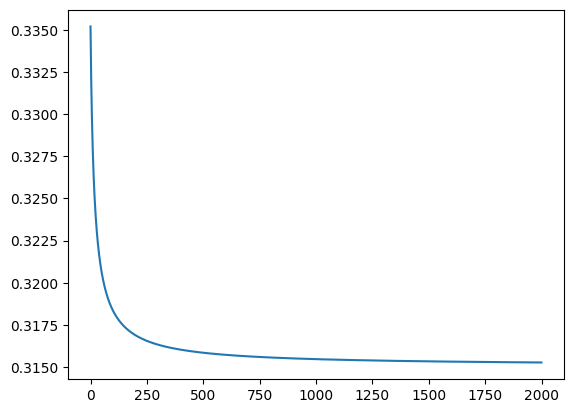

In [91]:
##Call the gradient_descent function here
##Plot the cost history here
weights = [1.0, 1.0]
max_its = 2000
alpha = 1.0
weight_history_percp, cost_history_percp = gradient_descent(perceptron_cost, alpha, max_its, weights, x_classification_data, y_classification_data)
plt.plot(cost_history_percp)

Q10) [11 points]  The file 'heart.csv' has 304 lines, each one corresponding to a data point. Each row (i.e., data point), has several columns.

* Read the data file. (Note that the first line is the header describing each column.)
* Use the data above to set y to be the "target" and X to be the remaining columns.
* Split your data into 80% train 20% test using train_test_split.
* Use sklearn to fit a logistic regression model on your training set. Use all the default parameters. Do not evaluate at this point. (You can find out about sklearn logistic regression here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [92]:
# read heart csv data
import pandas as pd

heart_data = pd.read_csv('heart.csv')
heart_data.columns
x_val = heart_data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y_val = heart_data['target']

x_val.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [93]:
## import logistic regression and the train_test split functions from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

##Your code here
X_train, X_test, y_train, y_test = train_test_split(x_val, y_val, test_size=0.2, random_state=42)
logistic_regression = LogisticRegression()
lr_model = logistic_regression.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Q11) [5 points] Use the .predict_proba function of the logistic regression model that you have learned on your X_test. Note that the .predict_proba function returns an array of tuples where each element corresponds to the predicted probability for class 0 and 1 of the data point.

In [94]:
##Your code here
predicted_val = lr_model.predict_proba(X_test)
predicted_val

array([[8.94047990e-01, 1.05952010e-01],
       [2.54402852e-01, 7.45597148e-01],
       [1.74457692e-01, 8.25542308e-01],
       [9.72232098e-01, 2.77679021e-02],
       [6.85832333e-02, 9.31416767e-01],
       [8.88478610e-02, 9.11152139e-01],
       [4.01030490e-01, 5.98969510e-01],
       [9.98768491e-01, 1.23150911e-03],
       [9.94888038e-01, 5.11196175e-03],
       [4.86972948e-01, 5.13027052e-01],
       [2.05266232e-01, 7.94733768e-01],
       [9.39277514e-01, 6.07224865e-02],
       [7.32670159e-02, 9.26732984e-01],
       [9.79100892e-01, 2.08991082e-02],
       [1.50688347e-02, 9.84931165e-01],
       [5.00534657e-02, 9.49946534e-01],
       [1.84972013e-02, 9.81502799e-01],
       [9.45319888e-01, 5.46801124e-02],
       [9.93341872e-01, 6.65812758e-03],
       [9.89043311e-01, 1.09566890e-02],
       [3.04178156e-01, 6.95821844e-01],
       [9.91468466e-01, 8.53153371e-03],
       [8.71188934e-01, 1.28811066e-01],
       [1.70624263e-01, 8.29375737e-01],
       [7.455556

Q12) [12 points]

Now you will report your results.

* Filter the predicted probabilties from the last question to an array containing only the probabilites for class 1. (I.e., you should no longer have tuples.)
* Use the roc_curve function from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html) to plot the ROC curve for your predictions using the predicted probabilities for class 1 and your y_test (use the default parameters).
* Print out the thresholds generated by the roc_curve function.
* Use the roc_auc_score function from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) to report the AUC score.

Thresholds [1.98493117e+00 9.84931165e-01 9.11152139e-01 8.87333023e-01
 8.05819421e-01 8.05255401e-01 7.94733768e-01 7.45597148e-01
 6.95821844e-01 6.85462203e-01 5.13027052e-01 8.33638565e-02
 7.42420595e-02 6.59382468e-02 6.07224865e-02 4.62185645e-02
 3.94574906e-02 8.48228313e-04]


Text(0, 0.5, 'true positive')

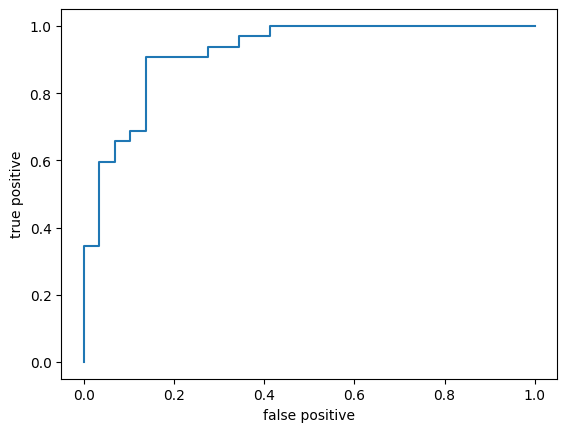

In [95]:
##Your code here
from sklearn import metrics
prob_class_one = [probabilities[1] for probabilities in predicted_val]
false_positive, true_positive, thresholds = metrics.roc_curve(y_test, prob_class_one)
print('Thresholds', thresholds)
plt.plot(false_positive, true_positive)
plt.xlabel('false positive')
plt.ylabel('true positive')

In [96]:
##Your code here
from sklearn.metrics import roc_auc_score
score = roc_auc_score(y_test, prob_class_one)
print('AUC Score:', score)

AUC Score: 0.9213362068965518
